# Google Brain - Ventilator Pressure Prediction

The data was obtained from kaggle and this is a current competition, you can get all the information here:

https://www.kaggle.com/c/ventilator-pressure-prediction


## Index 

* 1. Exploration & Data wrangling
* 2. Visualization
* 3. Models 
    * 3.1 Linear Regression
    * 3.2 ARIMA
    * NN-LSTM

In [1]:
#DOWNLOAD LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('C:/Users/Usuario/Desktop/Python_v2/Google Brain - Ventilator Pressure/')

# SET OPTIONS
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

In [2]:
# DOWNLOAD DATA
raw_data = pd.read_csv('../Google Brain - Ventilator Pressure/train.csv')
raw_data_test = pd.read_csv('../Google Brain - Ventilator Pressure/test.csv')
sample_submission = pd.read_csv('../Google Brain - Ventilator Pressure/sample_submission.csv')

## 1. Exploration

In [3]:
raw_data

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938


In [4]:
raw_data.describe()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,3.018000e+06,6.283886e+04,2.703618e+01,2.608072e+01,1.307225e+00,7.321615e+00,6.204493e-01,1.122041e+01
std,1.742443e+06,3.633526e+04,1.959549e+01,1.715231e+01,7.659778e-01,1.343470e+01,4.852752e-01,8.109703e+00
min,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00
25%,1.509001e+06,3.137700e+04,5.000000e+00,1.000000e+01,6.428995e-01,3.936623e-01,0.000000e+00,6.329607e+00
50%,3.018000e+06,6.276550e+04,2.000000e+01,2.000000e+01,1.308123e+00,4.386146e+00,1.000000e+00,7.032628e+00
75%,4.527000e+06,9.430100e+04,5.000000e+01,5.000000e+01,1.965502e+00,4.983895e+00,1.000000e+00,1.364103e+01
max,6.036000e+06,1.257490e+05,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01


In [40]:
raw_data.isna().sum()

id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

In [5]:
raw_data_test

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0
...,...,...,...,...,...,...,...
4023995,4023996,125748,20,10,2.530117,4.971245,1
4023996,4023997,125748,20,10,2.563853,4.975709,1
4023997,4023998,125748,20,10,2.597475,4.979468,1
4023998,4023999,125748,20,10,2.631134,4.982648,1


In [6]:
raw_data_test.describe()

,id,breath_id,R,C,time_step,u_in,u_out
count,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06
mean,2.012000e+06,6.292796e+04,2.710785e+01,2.607038e+01,1.307083e+00,7.338098e+00,6.203864e-01
std,1.161629e+06,3.624924e+04,1.954281e+01,1.717103e+01,7.658902e-01,1.350955e+01,4.852908e-01
min,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.006001e+06,3.153050e+04,5.000000e+00,1.000000e+01,6.428454e-01,4.096735e-01,0.000000e+00
50%,2.012000e+06,6.305750e+04,2.000000e+01,2.000000e+01,1.308083e+00,4.377512e+00,1.000000e+00
75%,3.018000e+06,9.433325e+04,5.000000e+01,5.000000e+01,1.965240e+00,4.983472e+00,1.000000e+00
max,4.024000e+06,1.257480e+05,5.000000e+01,5.000000e+01,2.935203e+00,1.000000e+02,1.000000e+00


In [41]:
raw_data_test.isna().sum()

id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
dtype: int64

In [7]:
sample_submission

,id,pressure
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
4023995,4023996,0
4023996,4023997,0
4023997,4023998,0
4023998,4023999,0


## 2. Visualization

<AxesSubplot:>

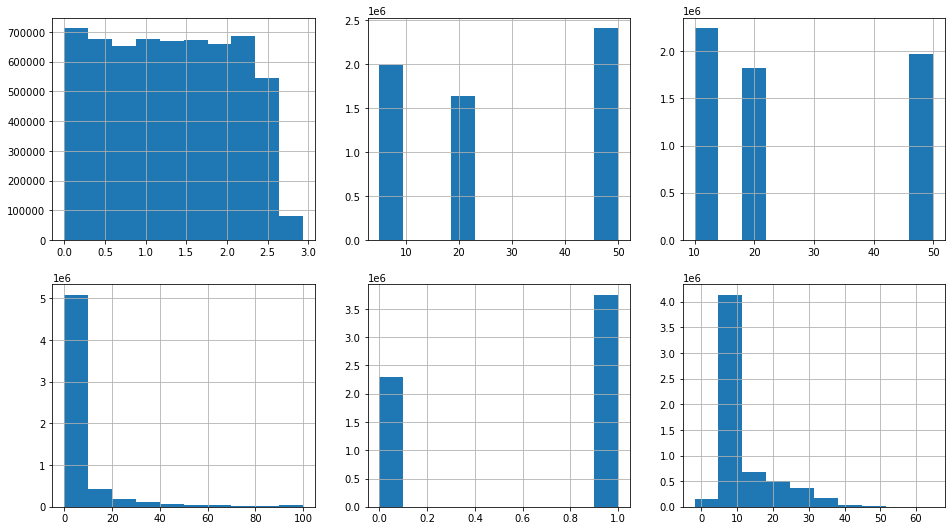

In [8]:
fig, axs = plt.subplots(ncols= 3,nrows = 2, figsize = [16,9])
raw_data['time_step'].hist(ax = axs[0,0])
raw_data['R'].hist(ax = axs[0,1])
raw_data['C'].hist(ax = axs[0,2])
raw_data['u_in'].hist(ax = axs[1,0])
raw_data['u_out'].hist(ax = axs[1,1])
raw_data['pressure'].hist(ax = axs[1,2])

In [9]:
def plotly_histogram(data, feature, target = None): 
    import pandas as pd
    import numpy as np


    import matplotlib.pyplot as plt
    import seaborn as sns
    #from ggplot import *
    import plotly.express as px
    
    
    
    gris = '#939EBF'
    azul_claro = '#99CFFF'
    azul_verdoso = '#0097B3'
    azul_oscuro = '#2B2880'
    naranja = '#F0573E'
    paleta_fer = [ azul_claro, gris,azul_oscuro, azul_verdoso, naranja]
    customPalette = sns.set_palette(sns.color_palette(paleta_fer))
    
    
    if target != None:
        fig = px.histogram(data, x=feature,  color = target, template = 'simple_white' ,color_discrete_sequence=paleta_fer)
    else:
        fig = px.histogram(data, x=feature, template="simple_white",  color_discrete_sequence=paleta_fer)
    return(fig)

In [10]:
def interact_plotly_histogram(X,y):
    from ipywidgets import interact,fixed
    lista_columnas = X.columns
    interaction = interact(plotly_histogram, data = fixed(X) ,feature = lista_columnas, target = y)
    return(interaction)

In [27]:
interact_plotly_histogram(raw_data.iloc[0:100000, :], raw_data.iloc[0:100000, :].columns)

interactive(children=(Dropdown(description='feature', options=('id', 'breath_id', 'R', 'C', 'time_step', 'u_in…

<function __main__.plotly_histogram(data, feature, target=None)>

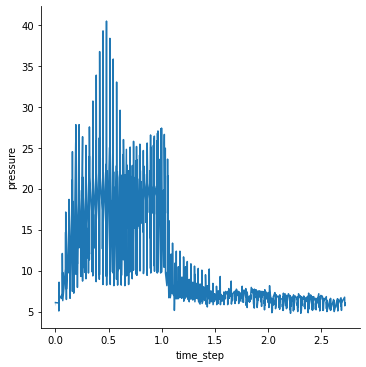

In [12]:
sns.relplot(x="time_step", y="pressure", kind="line", data=raw_data.iloc[0:1000])

In [13]:
plot_serie = raw_data.groupby(['breath_id'], as_index = False).agg({'pressure' : 'mean'})
plot_serie

,breath_id,pressure
0,1,10.841247
1,2,9.334145
2,3,13.534698
3,4,13.914329
4,5,9.666322
...,...,...
75445,125740,7.815618
75446,125742,15.216677
75447,125743,7.597682
75448,125745,13.591818


# 3. Models

## 3.1. Model Linear Regression

In [14]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error

In [15]:
# GET DUMMIES R & C
R = pd.get_dummies(raw_data.R, prefix = 'R')
C = pd.get_dummies(raw_data.C, prefix = 'C')

In [16]:
# Merge features
X = raw_data[['time_step', 'u_in', 'u_out', 'pressure']]
X = pd.concat([ C, R, X], axis = 1)
X

,C_10,C_20,C_50,R_5,R_20,R_50,time_step,u_in,u_out,pressure
0,0,0,1,0,1,0,0.000000,0.083334,0,5.837492
1,0,0,1,0,1,0,0.033652,18.383041,0,5.907794
2,0,0,1,0,1,0,0.067514,22.509278,0,7.876254
3,0,0,1,0,1,0,0.101542,22.808822,0,11.742872
4,0,0,1,0,1,0,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...,...,...
6035995,1,0,0,0,0,1,2.504603,1.489714,1,3.869032
6035996,1,0,0,0,0,1,2.537961,1.488497,1,3.869032
6035997,1,0,0,0,0,1,2.571408,1.558978,1,3.798729
6035998,1,0,0,0,0,1,2.604744,1.272663,1,4.079938


In [17]:
# TRAIN/TEST 
a = np.random.randn(len(X)) 
check = (a<0.8) # 80% TRAIN 
training = X[check]
test = X[~check]

In [18]:
lm = smf.ols(formula = 'pressure ~ time_step + u_in + u_out + C_10 + C_20 + C_50 + R_5 + R_20 + R_50',
             data = training).fit()

In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pressure   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 4.241e+05
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:05:02   Log-Likelihood:            -1.5554e+07
No. Observations:             4756985   AIC:                         3.111e+07
Df Residuals:                 4756977   BIC:                         3.111e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2515      0.004   2475.861      0.000      10.243      10.260
time_step     -0.3019      0.007    -43.085      0.000      -0.316      -0.288
u_in           0.0447      0.000    182.015      0.000       0.044       0.045
u_out         -9.3561      0.011   -820.610      0.000      -9.378      -9.334
C_10           3.6805      0.004    874.789      0.000       3.672       3.689
C_20           3.6938      0.004    822.859      0.000       3.685       3.703
C_50           2.8772      0.005    634.045      0.000       2.868       2.886
R_5            3.1396      0.005    695.510      0.000       3.131       3.148
R_20           3.5580      0.005    757.532      0.000       3.549       3.567
R_50           3.5538      0.004    866.347      0.000       3.546       3.562
==============================================================================
Omnibus:                  1495910.239   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6476567.236
Skew:                           1.496   Prob(JB):                         0.00
Kurtosis:                       7.871   Cond. No.                     2.64e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.61e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
# Low R2
# all parameters are significant
# Theoretically, only two of the three dummies should be used. 


In [21]:
prediction = lm.predict(test) # PREDICTION

In [22]:
### RESULTS ###

In [23]:
MAE = sum(abs((test['pressure'] - prediction)/len(prediction)))
MAE

3.944623364142504

### 3.1.1 Cross-validation with sklearn

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


In [29]:
y = X['pressure']


In [30]:
%%time
modelo = LinearRegression()
scores = cross_val_score(modelo, X, y, cv=5, scoring = 'neg_mean_absolute_error')

Wall time: 18.7 s


In [31]:
scores

array([-6.80994196e-13, -4.69460915e-13, -9.74019048e-13, -8.20915036e-13,
       -4.61465238e-13])

## 3.2 ARIMA 

This is a time series forecast, so we can use arima but we lose all the information given by the rest of the characteristics because ARIMA only uses the target variable.

In [32]:
from fern98.auto_sarimax import * # OWN FUNCTION


In [33]:
%%time
model = auto_sarimax(raw_data.iloc[0:1000, -1])
model

Wall time: 2min 12s


In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               pressure   No. Observations:                 1000
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1740.653
Date:                Thu, 14 Oct 2021   AIC                           3487.307
Time:                        15:08:29   BIC                           3502.030
Sample:                             0   HQIC                          3492.903
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9885      0.005    213.243      0.000       0.979       0.998
ma.L1          0.3772      0.023     16.597      0.000       0.333       0.422
sigma2         1.8569      0.040     46.524      0.000       1.779       1.935
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             26194.45
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -2.99
Prob(H) (two-sided):                  0.01   Kurtosis:                        27.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
real_value = raw_data.iloc[1000:1020, -1]
real_value

1000    6.118700
1001    5.485981
1002    6.189002
1003    6.118700
1004    6.189002
1005    6.189002
1006    5.978096
1007    5.907794
1008    6.118700
1009    5.978096
1010    6.118700
1011    6.048398
1012    6.399909
1013    6.118700
1014    6.118700
1015    6.118700
1016    5.837492
1017    5.907794
1018    6.329607
1019    6.470211
Name: pressure, dtype: float64

In [36]:
prediccion = model.predict(start = 1000, end = 1019)

In [37]:
prediccion

1000    7.305614
1001    7.221701
1002    7.138752
1003    7.056755
1004    6.975700
1005    6.895577
1006    6.816373
1007    6.738079
1008    6.660685
1009    6.584180
1010    6.508553
1011    6.433795
1012    6.359895
1013    6.286845
1014    6.214633
1015    6.143251
1016    6.072689
1017    6.002938
1018    5.933987
1019    5.865829
Name: predicted_mean, dtype: float64

In [43]:
MAE = sum(abs((real_value - prediccion)/len(prediccion)))
MAE

0.5777287708690187

* MAE quite a bit lower but we have only used 1000 values and it takes 2min and 23s, unfeasible to use ARIMA 

* Maybe we can use the SARIMAX(1,0,1) for the whole series, but it is not worth it because we are losing too much information from the other variables

## 3.3 NN- LSTM

To be continued..